In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [13]:

# Load and encode dataset
df = pd.read_csv('mushroom.csv')
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
df_encoded

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0            889          4            2          7        0     1   
1            786          4            0          6        0     1   
2            246          3            1          5        1     4   
3            221          0            2          4        1     3   
4            630          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1995         656          4            2          0        1     4   
1996         885          4            2          5        1     5   
1997         205          2            1          3        1     3   
1998         329          0            3          7        0     7   
1999         814          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                   1             2          0           7  ...          0   
1                   3             1          1           3  ...          1   
2                   1             1          0           8  ...          1   
3                   3             0          0           6  ...          0   
4                   2             1          1           6  ...          1   
...               ...           ...        ...         ...  ...        ...   
1995                0             1          1           3  ...          0   
1996                0             2          1           9  ...          0   
1997                3             0          1           7  ...          0   
1998                2             0          1           6  ...          1   
1999                1             0          1           8  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1995           1            1          2                  6           0   
1996           2            1          7                  8           2   
1997           0            2          1                  8           0   
1998           3            1          0                  1           5   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1           916           190  
1           5      0           128           750  
2           5      1           537           281  
3           0      1           234           829  
4           4      1           895           484  
...       ...    ...           ...           ...  
1995        1      1           283           680  
1996        5      1           335           521  
1997        6      1           859           438  
1998        6      1           679           320  
1999        4      1           825           832  

[2000 rows x 26 columns]

In [4]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Reduce to 2D and 3D for visualization
pca_2d = PCA(n_components=2).fit_transform(X)
pca_3d = PCA(n_components=3).fit_transform(X)

In [6]:
# Prepare test splits for PCA'd versions
X_train_pca_2d, X_test_pca_2d = train_test_split(pca_2d, test_size=0.3, random_state=42)
X_train_pca_3d, X_test_pca_3d = train_test_split(pca_3d, test_size=0.3, random_state=42)

In [7]:
# Kernels to test
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    print(f"\n=== SVM with {kernel} kernel ===")
    model = SVC(kernel=kernel, class_weight='balanced')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))



=== SVM with linear kernel ===
              precision    recall  f1-score   support

           0       0.34      0.51      0.41       185
           1       0.72      0.55      0.62       415

    accuracy                           0.54       600
   macro avg       0.53      0.53      0.51       600
weighted avg       0.60      0.54      0.55       600


=== SVM with rbf kernel ===
              precision    recall  f1-score   support

           0       0.31      0.42      0.36       185
           1       0.69      0.58      0.63       415

    accuracy                           0.53       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.58      0.53      0.55       600


=== SVM with poly kernel ===
              precision    recall  f1-score   support

           0       0.28      0.23      0.25       185
           1       0.68      0.74      0.71       415

    accuracy                           0.58       600
   macro avg       0.48      0.48    

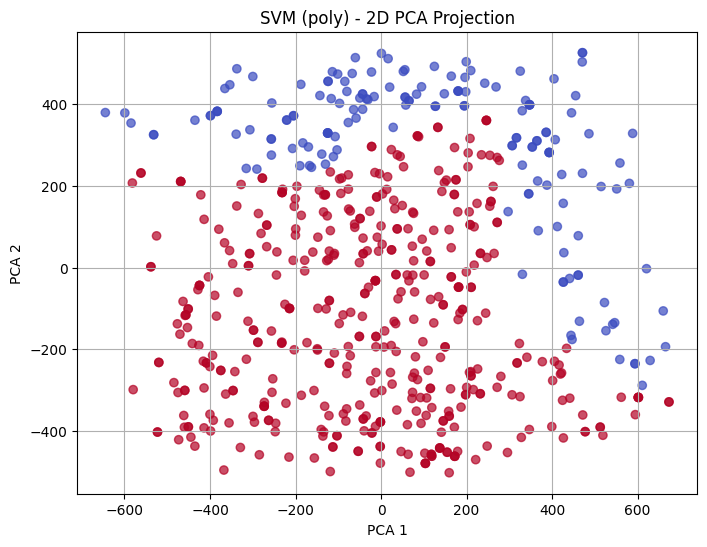

In [14]:

    # 2D SVM plot
    model_2d = SVC(kernel=kernel, class_weight='balanced')
    model_2d.fit(X_train_pca_2d, y_train)
    y_pred_2d = model_2d.predict(X_test_pca_2d)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_pca_2d[:, 0], X_test_pca_2d[:, 1], c=y_pred_2d, cmap='coolwarm', alpha=0.7)
    plt.title(f'SVM ({kernel}) - 2D PCA Projection')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()

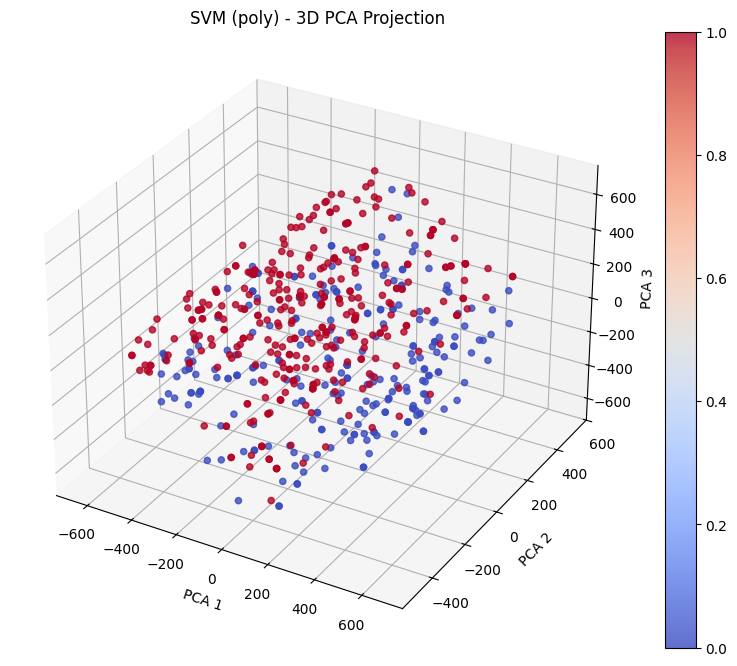

In [15]:
    # 3D SVM plot
    model_3d = SVC(kernel=kernel, class_weight='balanced')
    model_3d.fit(X_train_pca_3d, y_train)
    y_pred_3d = model_3d.predict(X_test_pca_3d)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_test_pca_3d[:, 0], X_test_pca_3d[:, 1], X_test_pca_3d[:, 2],
                         c=y_pred_3d, cmap='coolwarm', alpha=0.8)
    ax.set_title(f'SVM ({kernel}) - 3D PCA Projection')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    plt.colorbar(scatter)
    plt.show()